# PCA Analysis

- To Reduce the Dimensions
- For Plotting
- Encrypting the data

### IRIS dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set()

In [2]:
df=pd.read_csv("iris.csv")
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [3]:
len(df)

150

In [4]:
df.species.values

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [5]:
df["species"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

## Visualization of the Dataset

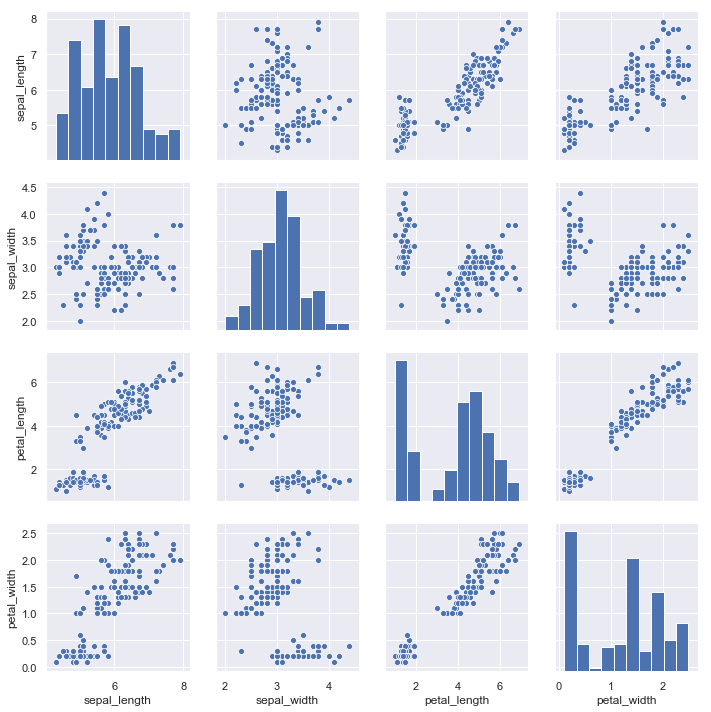

In [6]:
sns.pairplot(df);

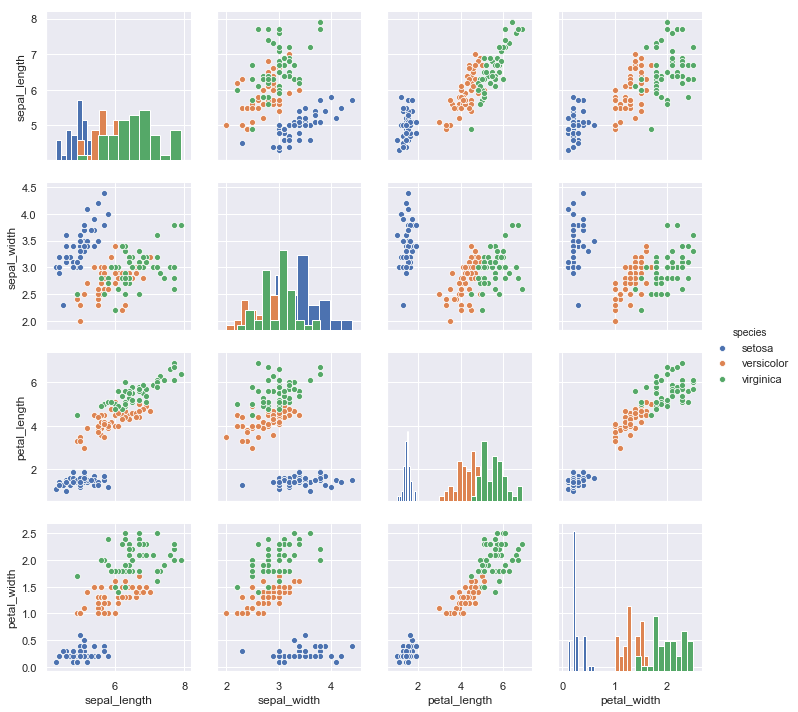

In [7]:
sns.pairplot(df,hue="species",diag_kind="hist")

# Preparing Data for PCA Analysis

In [8]:
x_data=df.iloc[:,:4]
x_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Each features are in different Scale

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc=StandardScaler()

In [11]:
X=pd.DataFrame(sc.fit_transform(x_data))
X.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


# PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca=PCA()

In [14]:
X_pca=pd.DataFrame(pca.fit_transform(X))
X_pca.head()

,0,1,2,3
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397


In [15]:
#  Variance captured by each PCA elements
pca_evr=pca.explained_variance_ratio_
print(pca_evr)

[0.72770452 0.23030523 0.03683832 0.00515193]


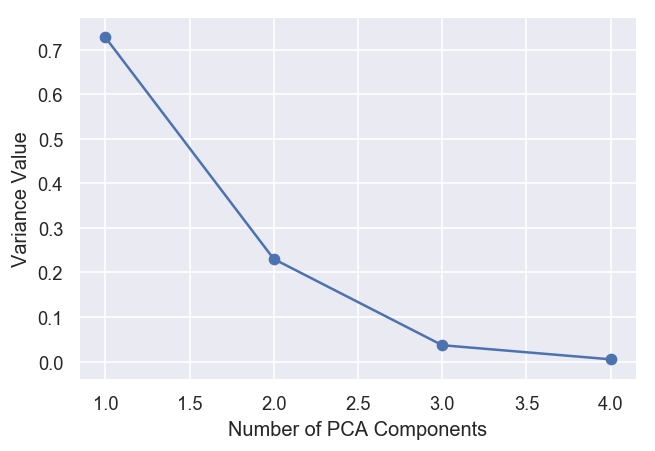

In [16]:
plt.figure(dpi=120)
plt.scatter(np.arange(1,len(pca_evr)+1),pca_evr)
plt.plot(np.arange(1,len(pca_evr)+1),pca_evr)
plt.xlabel("Number of PCA Components")
plt.ylabel("Variance Value")
plt.show()

### Selecting only the first two components for plotting

In [17]:
bha=PCA(n_components=2)

In [18]:
bha1=bha.fit_transform(X)

In [19]:
bha1

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

In [20]:
bha2=pd.DataFrame(bha1,columns=["x1","x2"])
print(len(bha2))
bha2.head()

150


,x1,x2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


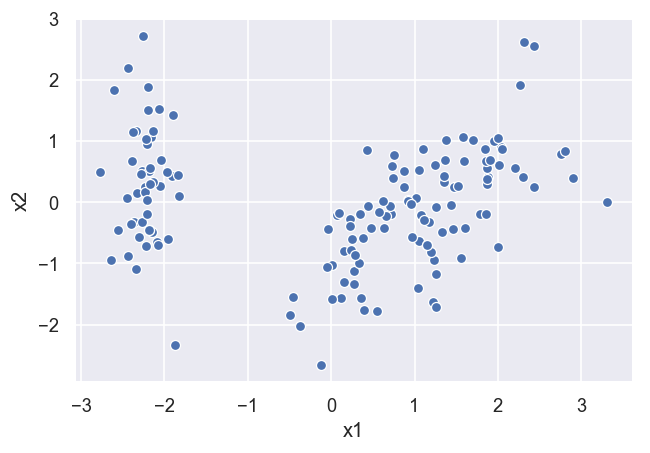

In [21]:
plt.figure(dpi=120)
sns.scatterplot(x=bha2.x1,y=bha2.x2)

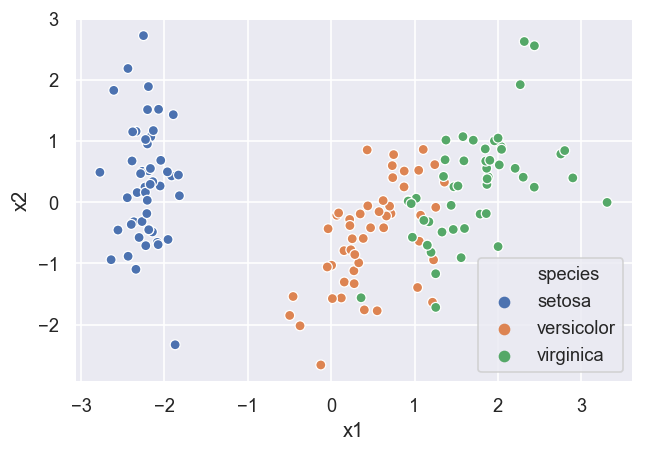

In [22]:
plt.figure(dpi=120)
sns.scatterplot(x=bha2.x1,y=bha2.x2,hue=df.species)

# Clustering

> Grouping

- K Means Clustering


In [23]:
from sklearn.cluster import KMeans

In [24]:
km = KMeans(n_clusters=3)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

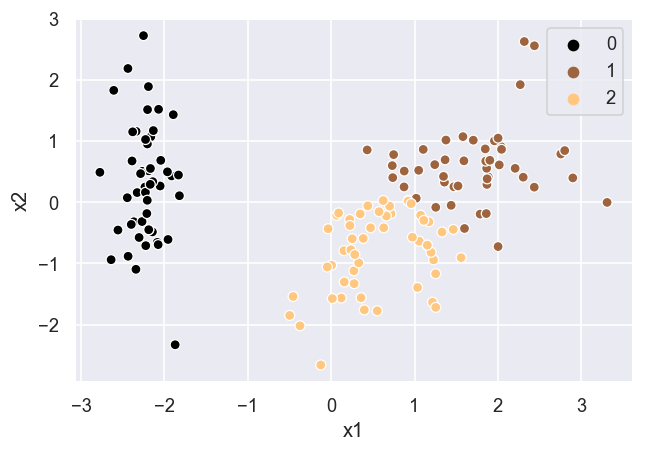

In [26]:
plt.figure(dpi=120)
sns.scatterplot(x=bha2.x1,y=bha2.x2,hue=y_cluster_kmeans,palette="copper")

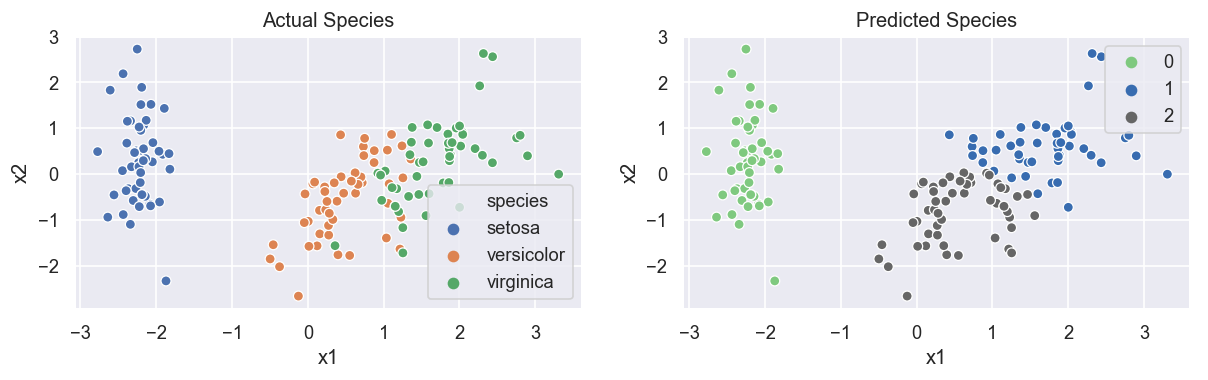

In [27]:
plt.figure(dpi=120,figsize=(12,3))
plt.subplot(1,2,1)
sns.scatterplot(x=bha2.x1,y=bha2.x2,hue=df.species)
plt.title("Actual Species")
plt.subplot(1,2,2)
sns.scatterplot(x=bha2.x1,y=bha2.x2,hue=y_cluster_kmeans,palette="Accent")
plt.title("Predicted Species")
plt.show()

## How to guess K value

#### Elbow method
#### Calculate the sum of squared distances for each k value

In [28]:
Sum_of_squared_distances = []
K = range(1,10)
for k in tqdm(K):
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

100%|███████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 25.19it/s]


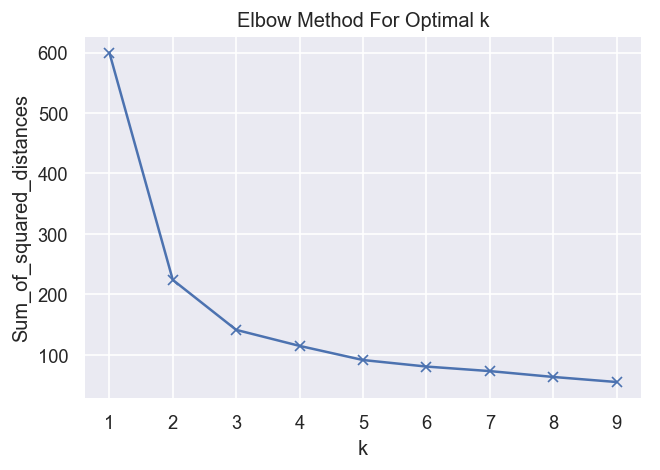

In [29]:
plt.figure(dpi=120)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Elbow point at k = 3

# Questions